In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-03-17 12:57:53,276 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-03-17 12:57:53,277 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-03-17 12:57:53,278 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-17 12:57:53,278 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-03-17 12:57:53,278 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2022-03-17 12:57:57,092 Projection completed
yt : [INFO     ] 2022-03-17 12:57:57,092 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-03-17 12:57:57,093 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-03-17 12:57:57,093 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-03-17 12:57:57,093 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-03-17 12:57:57,094 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


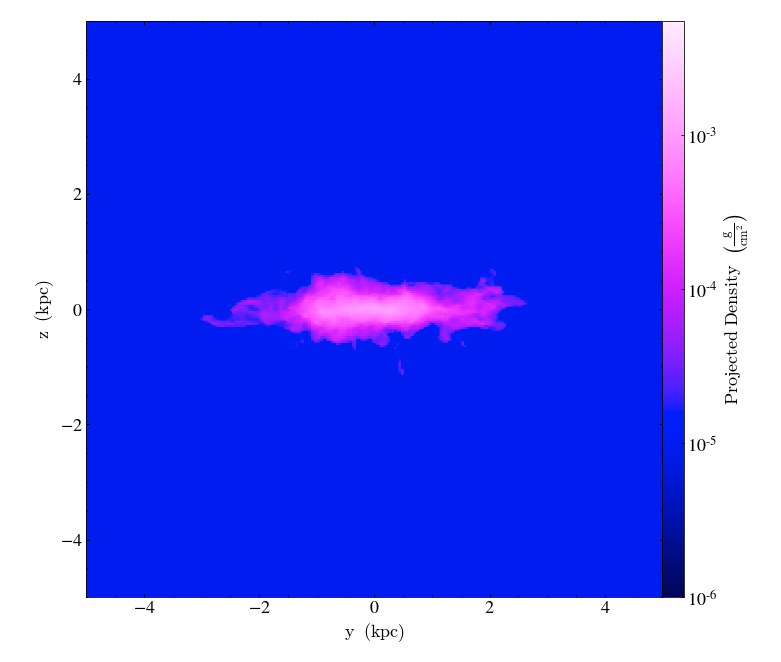

yt : [INFO     ] 2022-03-17 12:58:00,571 Projection completed
yt : [INFO     ] 2022-03-17 12:58:00,572 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-03-17 12:58:00,572 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-03-17 12:58:00,573 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-03-17 12:58:00,573 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-03-17 12:58:00,573 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


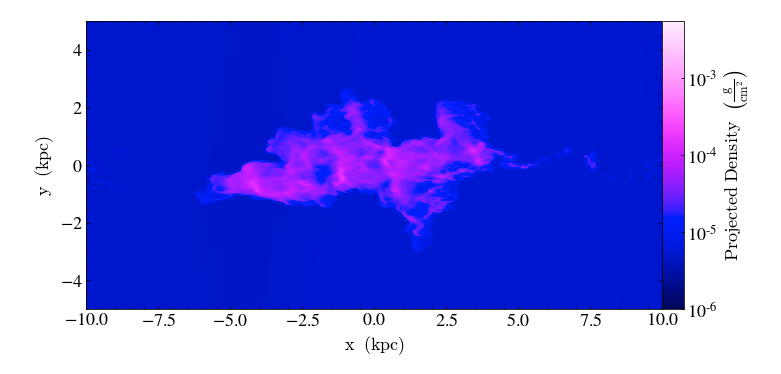

yt : [INFO     ] 2022-03-17 12:58:03,741 Projection completed
yt : [INFO     ] 2022-03-17 12:58:03,742 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-03-17 12:58:03,742 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-03-17 12:58:03,742 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-03-17 12:58:03,743 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-03-17 12:58:03,744 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


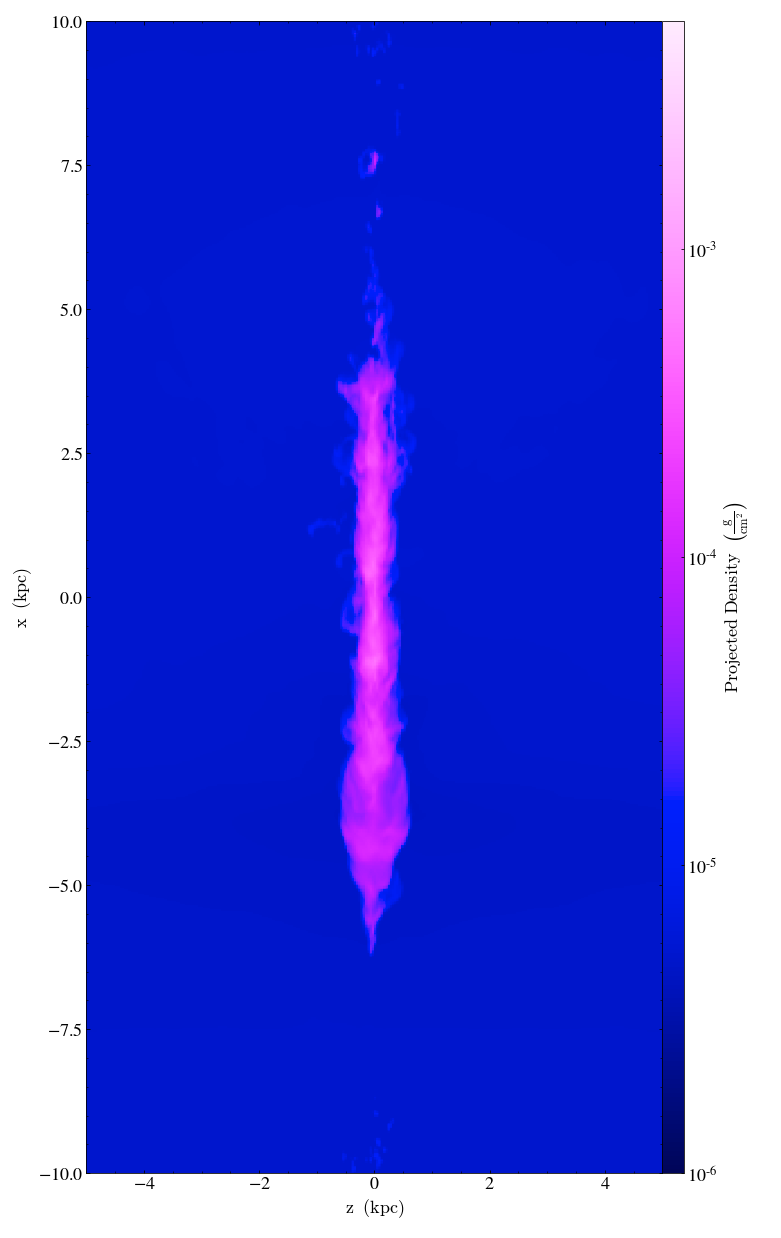

In [3]:
px = yt.ProjectionPlot(ds, 'x', 'density')
px.set_cmap(("density"), "cet_bmw")
px.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
px.show()

pz = yt.ProjectionPlot(ds, 'z', 'density')
pz.set_cmap(("density"), "cet_bmw")
pz.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
pz.show()

py = yt.ProjectionPlot(ds, 'y', 'density')
py.set_cmap(("density"), "cet_bmw")
py.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
py.show()

In [56]:
def phase_plot(ds, ion_, ion_den, add_ion=False, zmin=None, zmax=None):
    if add_ion==True:
        trident.add_ion_fields(ds, ions=[ion_], ftype="gas")
    
    ad = ds.all_data()
    
    fig = plt.figure()
    
    get_cmap("cet_bmw")

    grid = AxesGrid(
        fig,
        (0, 0, 1.6, 0.7),
        nrows_ncols=(1, 2),
        axes_pad=2,
        label_mode="all",
        share_all=False,
        cbar_location="right",
        cbar_mode ='each',
        cbar_size="3%",
        cbar_pad="0%",
        aspect=False,
    )

#     for i in range(len(ion_md)):
#         for j in range(len(ion_list)):
#             n = i/2
#             if i==0:
    p = yt.PhasePlot(ad, "density", "temperature", [ion_den],
                     weight_field="density", fractional=False)
    p.set_cmap(field=ion_den, cmap='cet_bmw')
    p.set_background_color(field=ion_den, color='black')
    p.set_font_size(16)
    p.annotate_title(ion_)
    p.set_colorbar_label(label=ion_+' '+'Density (g/cm$^3$)', field=ion_den)
    p.set_xlim(10**-30, 10**-23)
    p.set_ylim(10**3, 10**8)        
    if zmin is not None and zmax is not None:
        p.set_zlim([("gas", ion_den)], zmin, zmax)
        
    
        
    else:
        pass
#             else:
    v = yt.PhasePlot(ad, "density", "velocity_magnitude", [ion_den],
                    weight_field=ion_den, fractional=False)
    v.set_cmap(field=ion_den, cmap='cet_bmw')
    v.set_background_color(field=ion_den, color='black')
    v.set_font_size(16)
    v.annotate_title(ion_)
    v.set_colorbar_label(label=ion_+' '+'Density (g/cm$^3$)', field=ion_den)
    v.set_xlim(10**-30, 10**-23)
    v.set_ylim(10**2, 10**9)        
    if zmin is not None and zmax is not None:
        v.set_zlim([("gas", ion_den)], zmin, zmax)

    plot = p.plots[("gas", ion_den)]
    plot.figure = fig
    plot.axes = grid[0].axes
    plot.cax = grid.cbar_axes[0]
    p._setup_plots()
    
    plot2 = v.plots[("gas", ion_den)]
    plot2.figure = fig
    plot2.axes = grid[1].axes
    plot2.cax = grid.cbar_axes[1]
    v._setup_plots()
    return ad

## HI

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

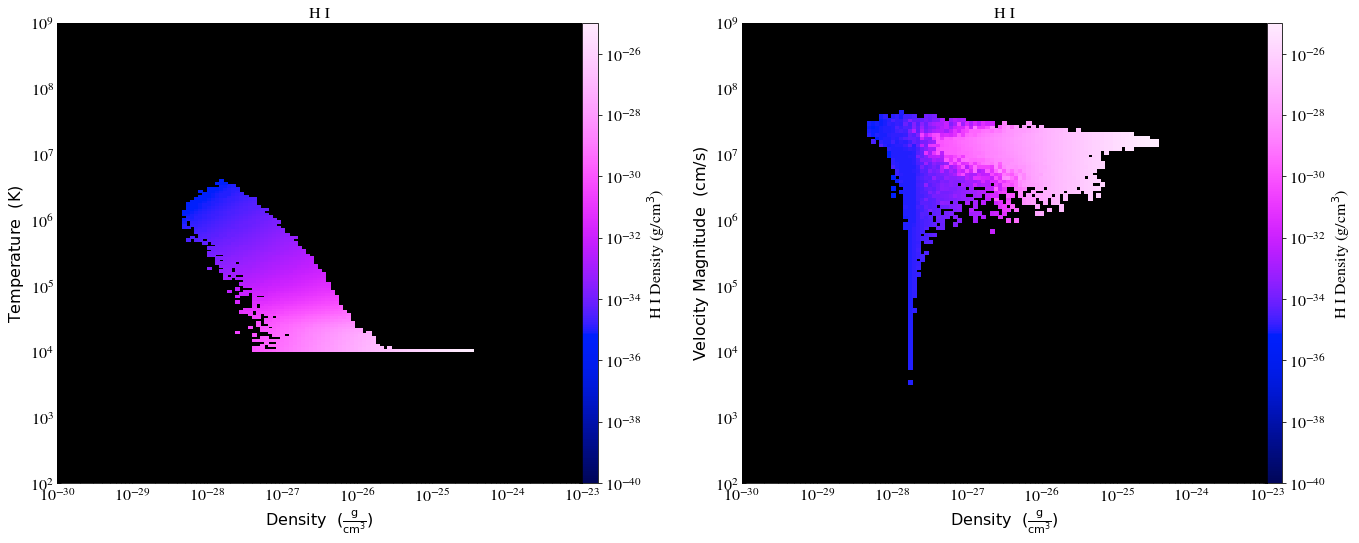

In [58]:
phase_plot(ds, ion_='H I', ion_den='H_p0_density', add_ion=False, zmin=10**-40, zmax=10**-25)

# Heavy/High Ionization Energy Ions

## Si IV

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

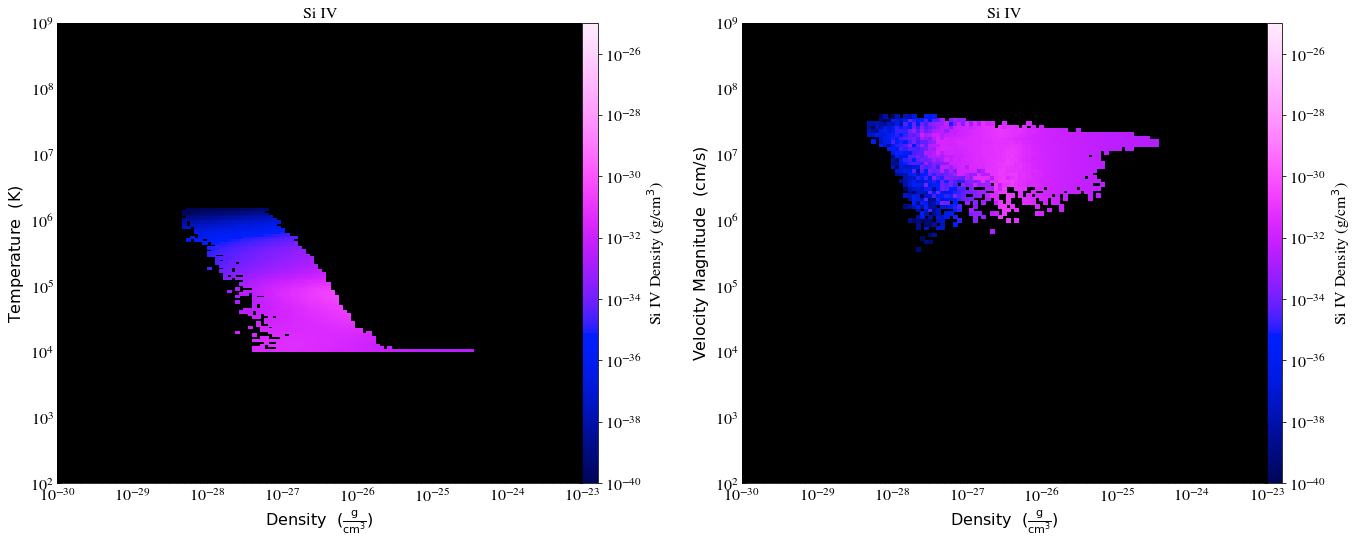

In [62]:
phase_plot(ds, ion_='Si IV', ion_den='Si_p3_density', add_ion=False, zmin=10**-40, zmax=10**-25)

## C IV

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

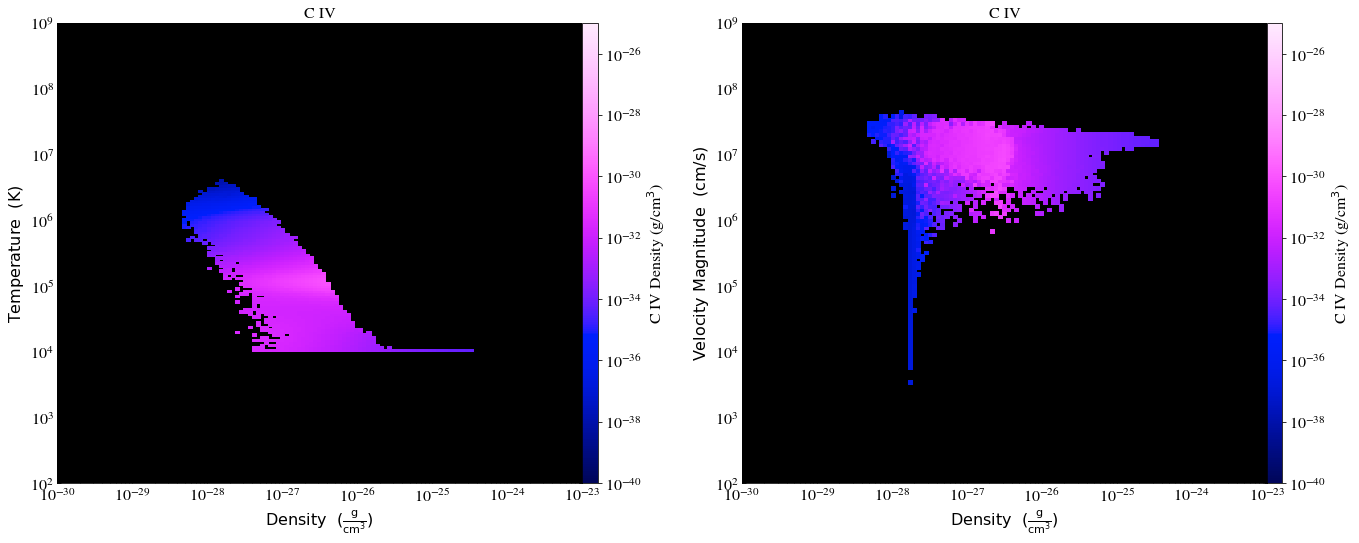

In [63]:
phase_plot(ds, ion_='C IV', ion_den='C_p3_density', zmin=10**-40, zmax=10**-25)

## Al III

yt : [WARNING  ] 2022-03-17 15:27:52,398 Field ('gas', 'Al_p2_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2022-03-17 15:27:52,399 Field ('gas', 'Al_p2_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-03-17 15:27:52,399 Field ('gas', 'Al_p2_density') already exists. Not clobbering.
yt : [WARNING  ] 2022-03-17 15:27:52,399 Field ('gas', 'Al_p2_mass') already exists. Not clobbering.


YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

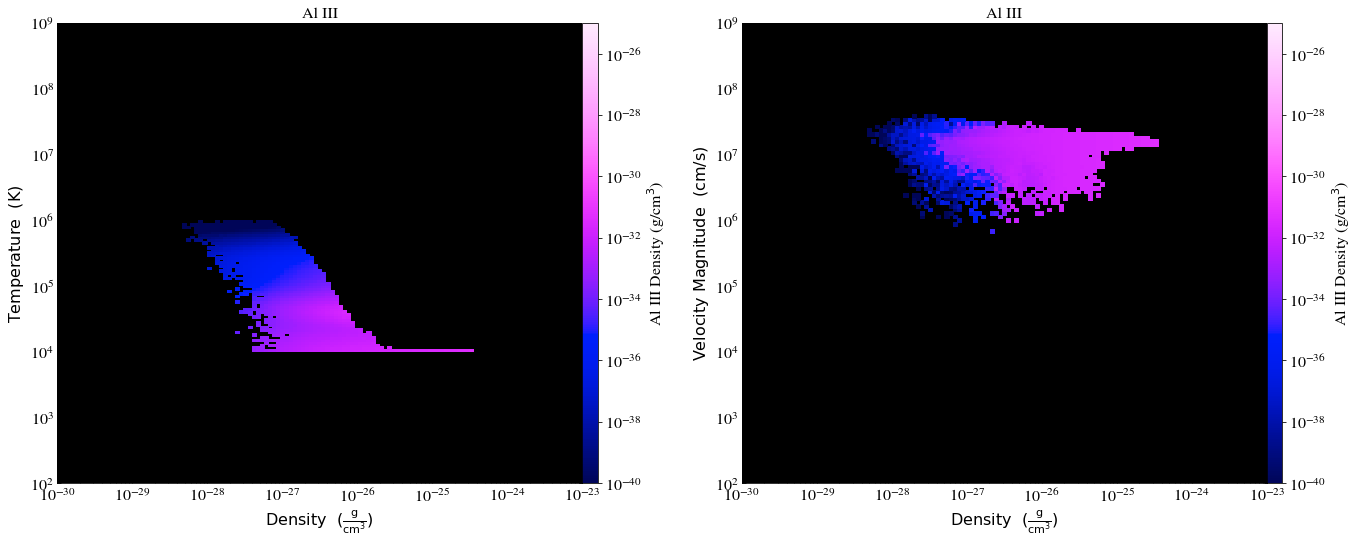

In [64]:
phase_plot(ds, ion_='Al III', ion_den='Al_p2_density', zmin=10**-40, zmax=10**-25, add_ion=True)

## Fe II

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

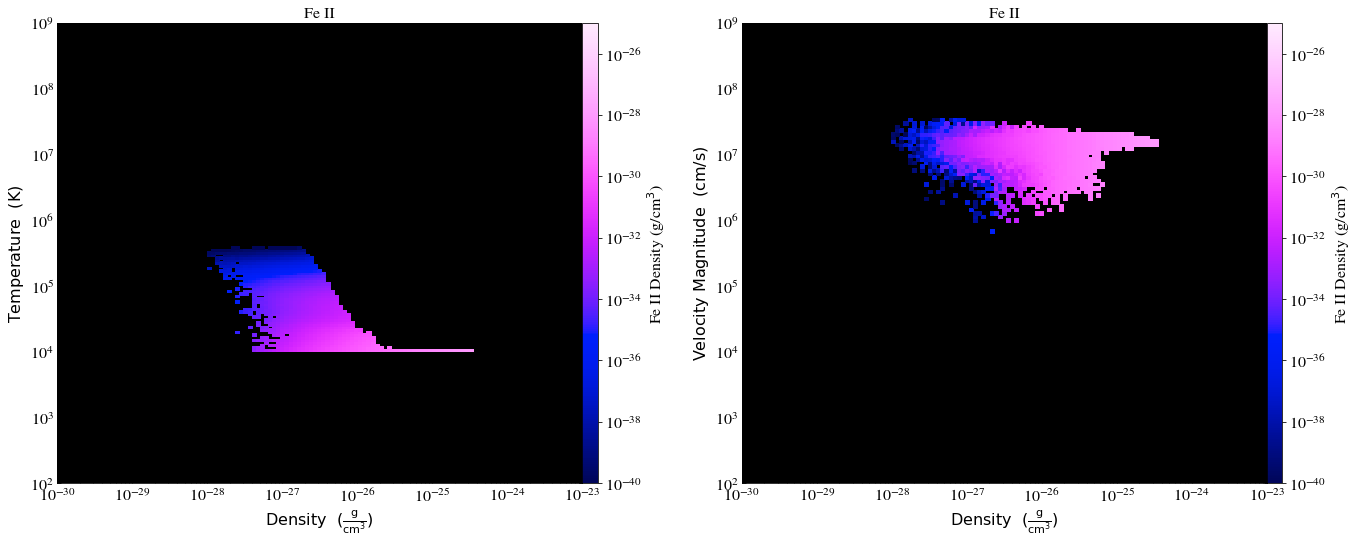

In [65]:
phase_plot(ds, ion_='Fe II', ion_den='Fe_p1_density', zmin=10**-40, zmax=10**-25, add_ion=True)

# Ions with low ionization energies

## O I

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

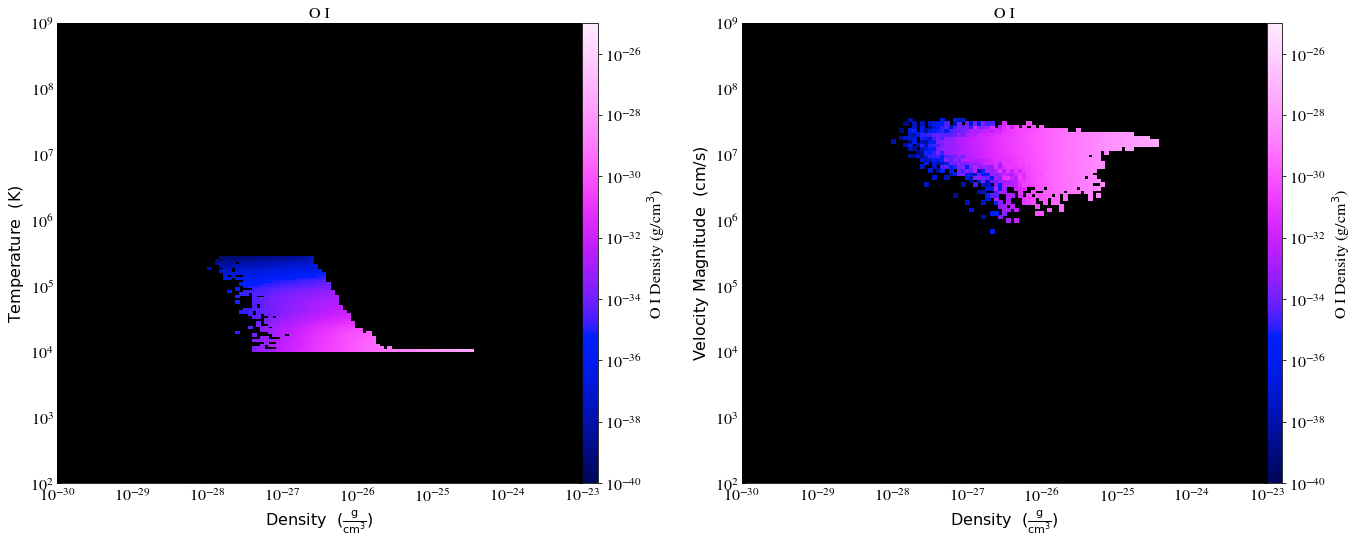

In [66]:
phase_plot(ds, ion_='O I', ion_den='O_p0_density', zmin=10**-40, zmax=10**-25, add_ion=True)

## Mg II

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

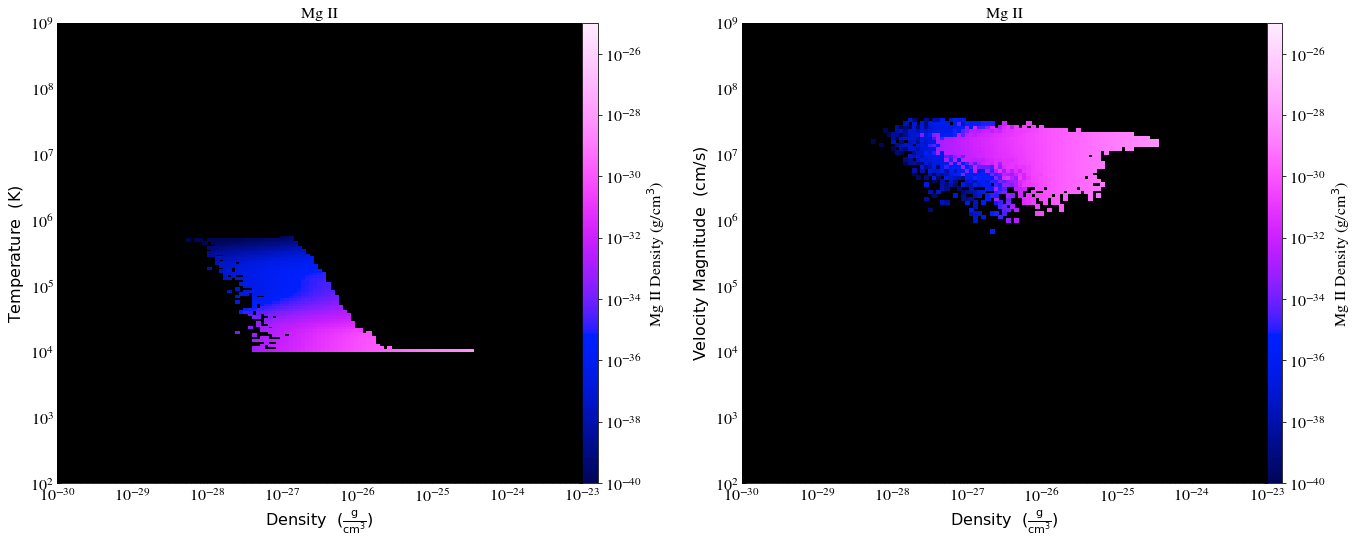

In [67]:
phase_plot(ds, ion_='Mg II', ion_den='Mg_p1_density', zmin=10**-40, zmax=10**-25, add_ion=True)

## C II

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

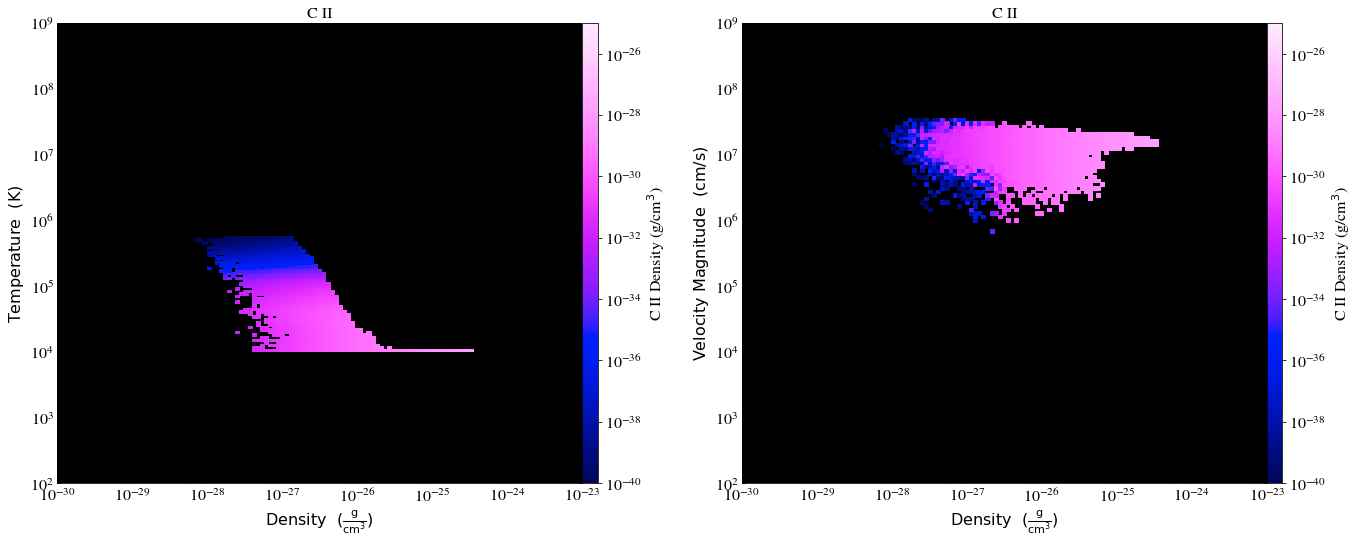

In [68]:
phase_plot(ds, ion_='C II', ion_den='C_p1_density', zmin=10**-40, zmax=10**-25, add_ion=True)

## Si II

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

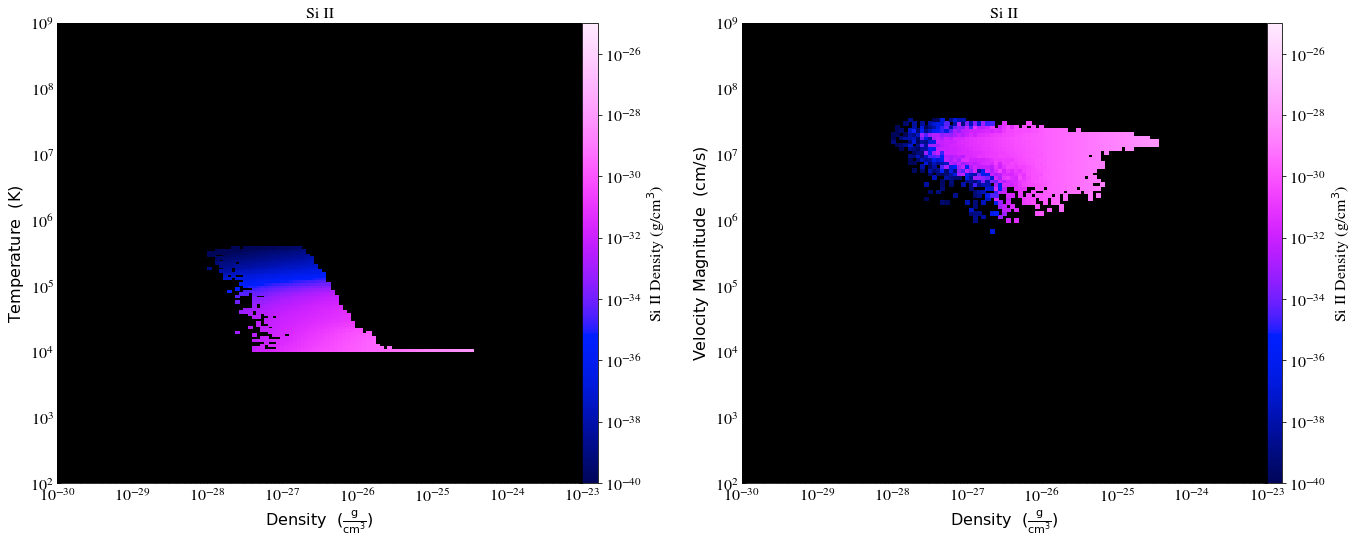

In [69]:
phase_plot(ds, ion_='Si II', ion_den='Si_p1_density', zmin=10**-40, zmax=10**-25, add_ion=True)

In [70]:
ds.derived_field_list

[('gas', 'Al_p2_density'),
 ('gas', 'Al_p2_ion_fraction'),
 ('gas', 'Al_p2_mass'),
 ('gas', 'Al_p2_number_density'),
 ('gas', 'C_p1_density'),
 ('gas', 'C_p1_ion_fraction'),
 ('gas', 'C_p1_mass'),
 ('gas', 'C_p1_number_density'),
 ('gas', 'C_p3_density'),
 ('gas', 'C_p3_ion_fraction'),
 ('gas', 'C_p3_mass'),
 ('gas', 'C_p3_number_density'),
 ('gas', 'Fe_p1_density'),
 ('gas', 'Fe_p1_ion_fraction'),
 ('gas', 'Fe_p1_mass'),
 ('gas', 'Fe_p1_number_density'),
 ('gas', 'H_density'),
 ('gas', 'H_ion_fraction'),
 ('gas', 'H_mass'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'H_number_density'),
 ('gas', 'H_p0_density'),
 ('gas', 'H_p0_ion_fraction'),
 ('gas', 'H_p0_mass'),
 ('gas', 'H_p0_number_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'Mg_p1_density'),
 ('gas', 'Mg_p1_ion_fraction'),
 ('gas', 'Mg_p1_mass'),
 ('gas', 'Mg_p1_number_density'),
 ('gas', 'O_density'),
 ('gas', 'O_ion_fraction'),
 ('gas', 'O_mass'),
 ('gas', 'O_number_density'),
 ('gas', 'O_p0_density'),
 ('gas', 'O_p0_ion_fr